In [1]:
import pandas as pd
from backtest import backtest_dca

import config as cfg

In [2]:
# !python load_data.py

# crypto

In [3]:
df_crypto = pd.read_csv("data/crypto.csv", index_col=0, parse_dates=True)
df_crypto = df_crypto.dropna()
df_crypto

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX
Date,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,10.865915
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,11.153615
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,11.384450
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,12.077613
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,11.740196
...,...,...,...,...,...,...,...,...,...,...
2026-02-02,78688.765625,2344.356689,774.579285,1.620547,104.471153,0.283123,0.298900,386.892914,9.806777,10.142554
2026-02-03,75633.546875,2227.558838,753.578186,1.574199,97.563904,0.285627,0.290788,374.591797,9.450989,9.895763
2026-02-04,73019.703125,2143.504150,697.861755,1.510476,92.029305,0.282773,0.286301,382.406860,9.251476,9.711348


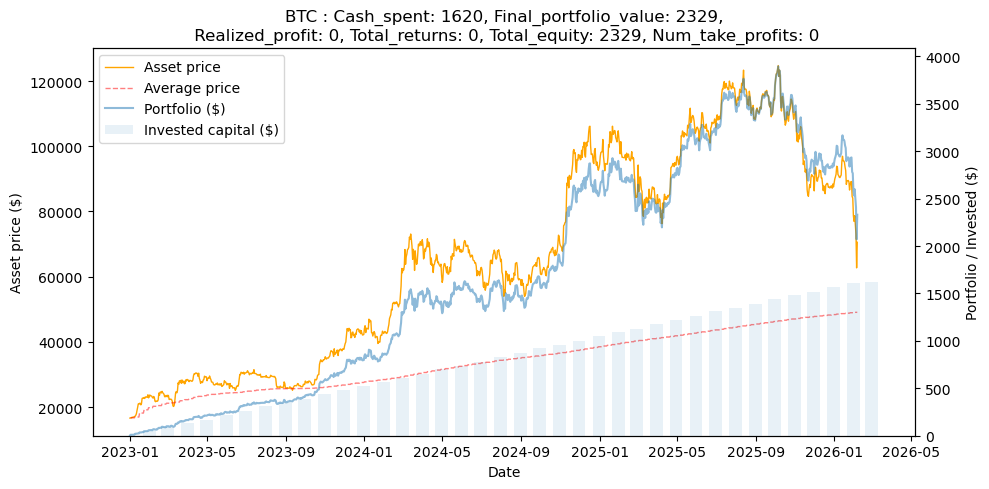

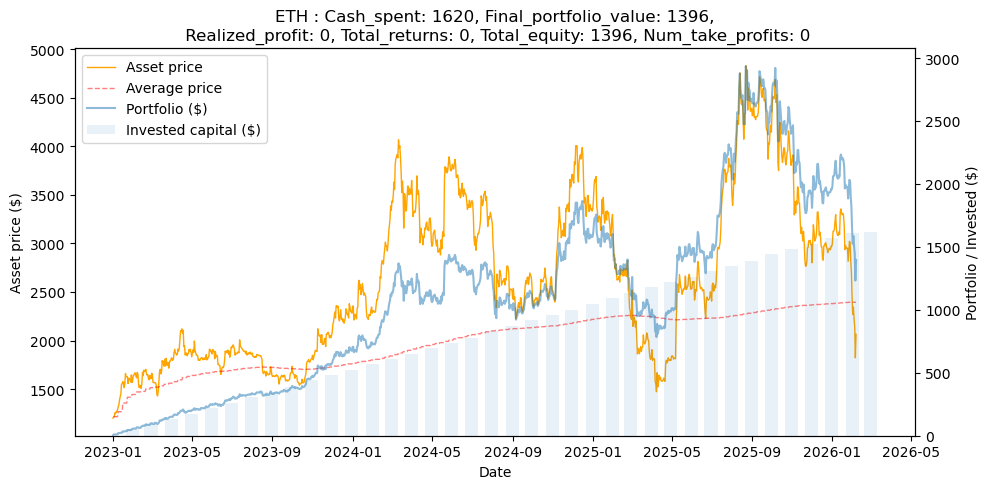

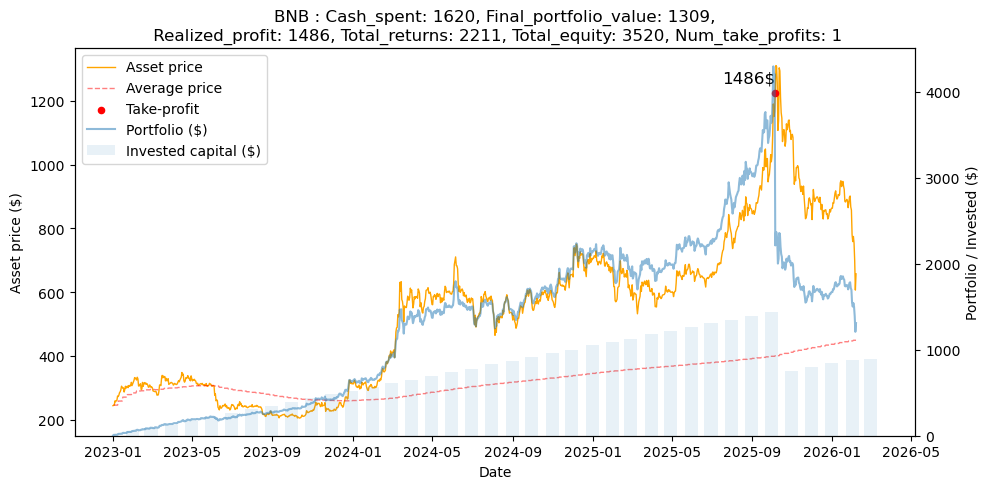

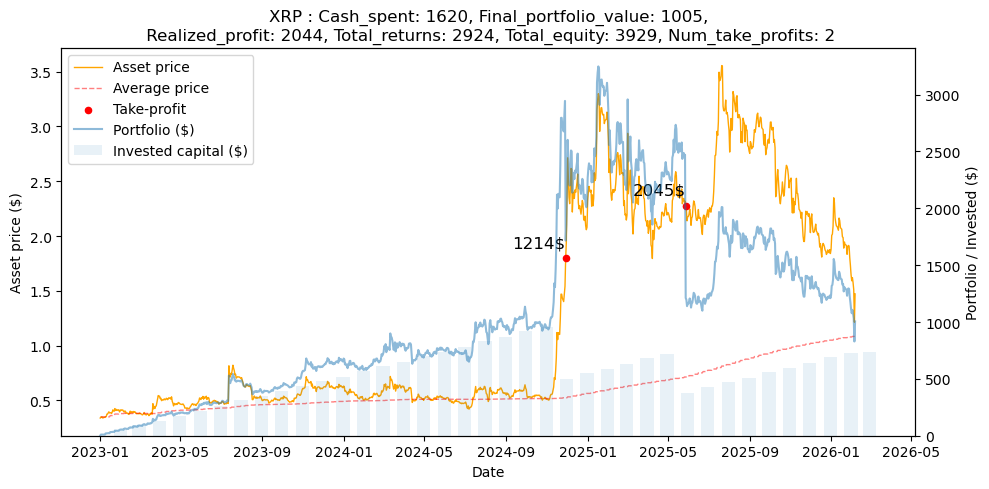

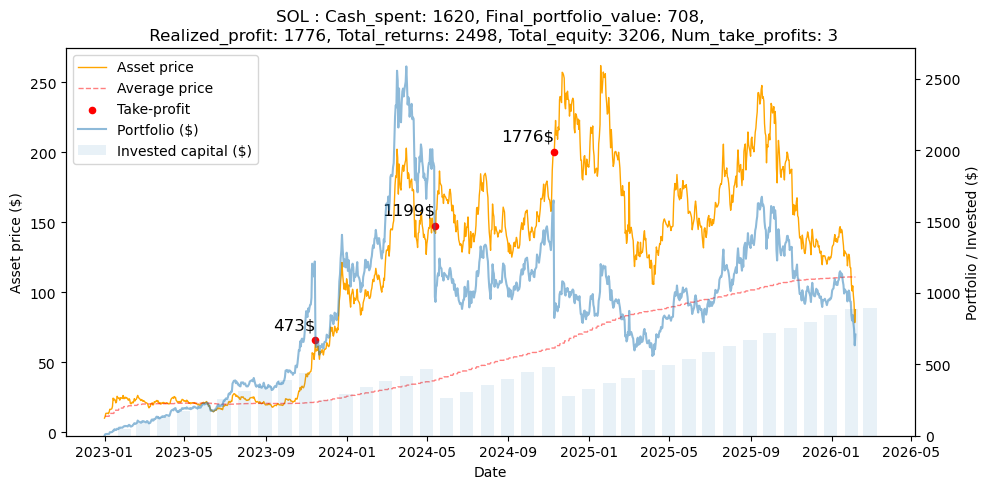

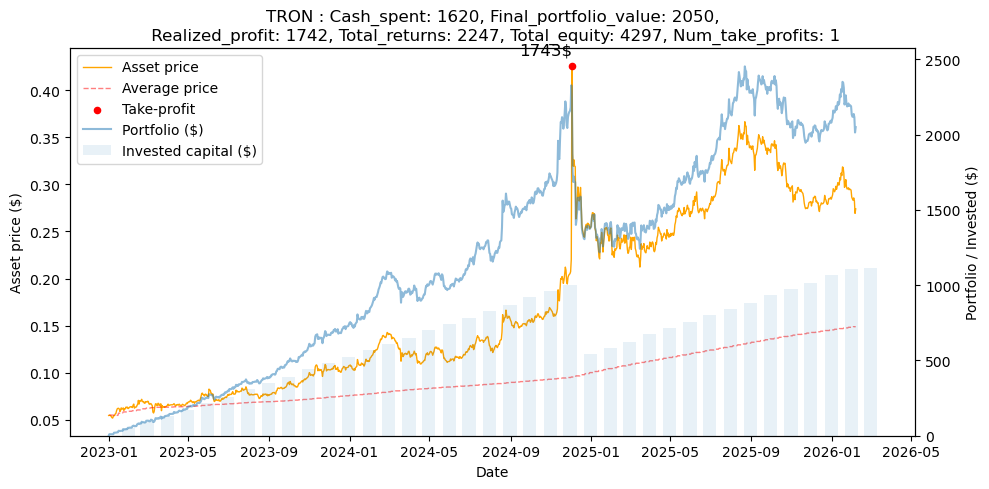

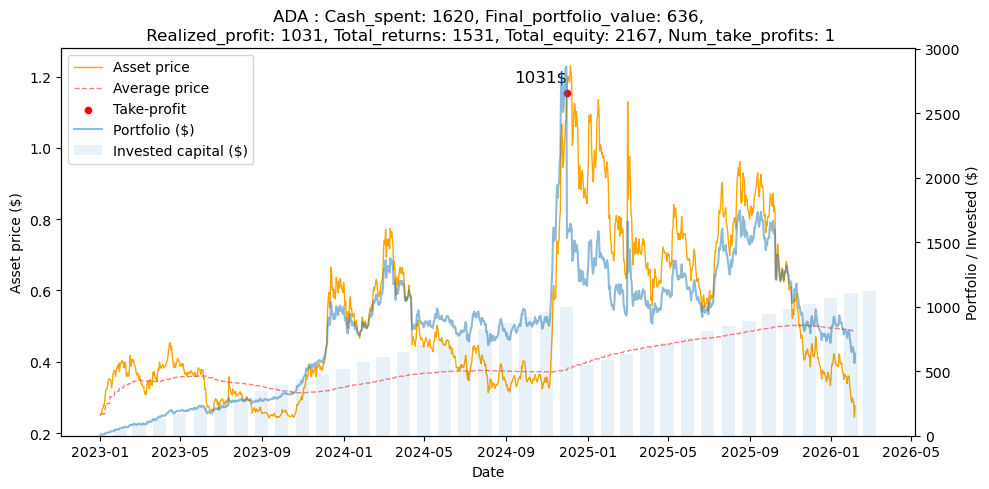

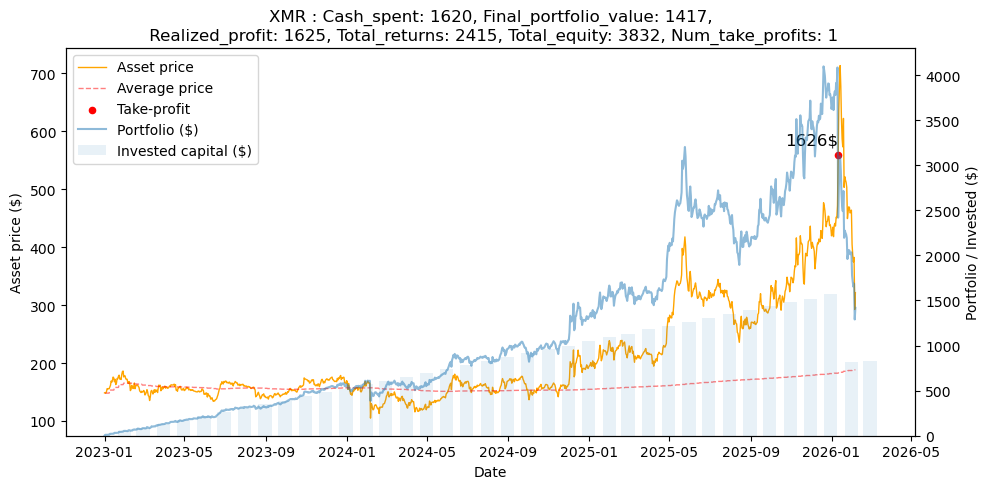

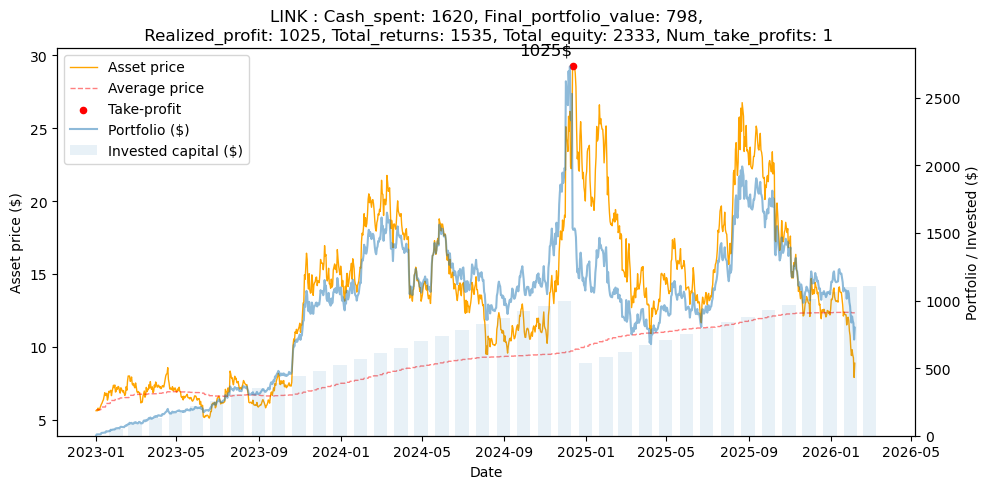

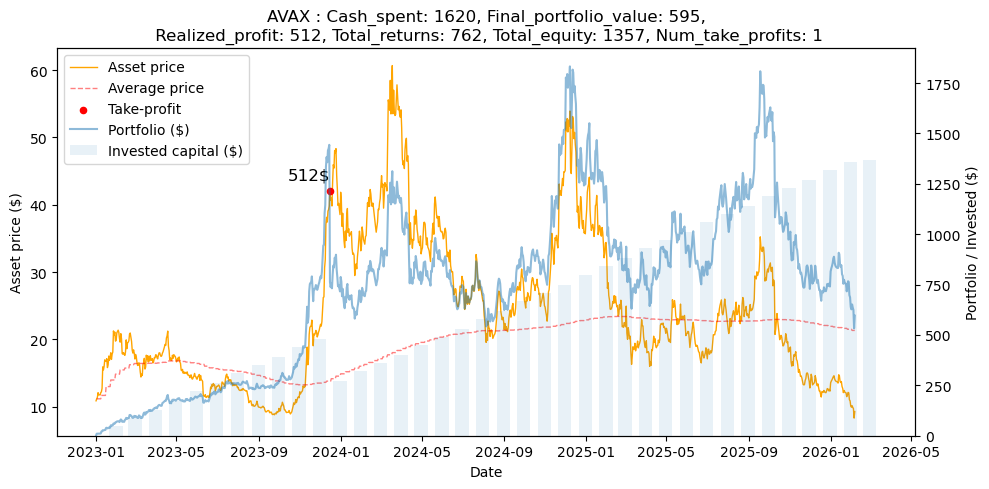

In [4]:
for token in df_crypto.columns:
    token_prices = df_crypto[token]

    backtest_dca(
        target=token,
        prices=token_prices,
        buy_amount=cfg.crypto_regular_amount,
        freq=cfg.crypto_freq,
        fee=cfg.crypto_fee,
        profit_multiple=cfg.crypto_profit_multiple,
        cooldown_days=180,
        plot=True
    )

# stocks

In [5]:
df_stocks = pd.read_csv("data/stocks.csv", index_col=0, parse_dates=True)
df_stocks = df_stocks.dropna()
df_stocks

,SPY,ASML.AS
Date,,
2023-01-03,380.820007,520.299988
2023-01-04,383.760010,537.000000
2023-01-05,379.380005,539.900024
2023-01-06,388.079987,551.500000
2023-01-09,387.859985,586.599976
...,...,...
2026-02-02,695.409973,1224.800049
2026-02-03,689.530029,1190.400024
2026-02-04,686.190002,1140.599976


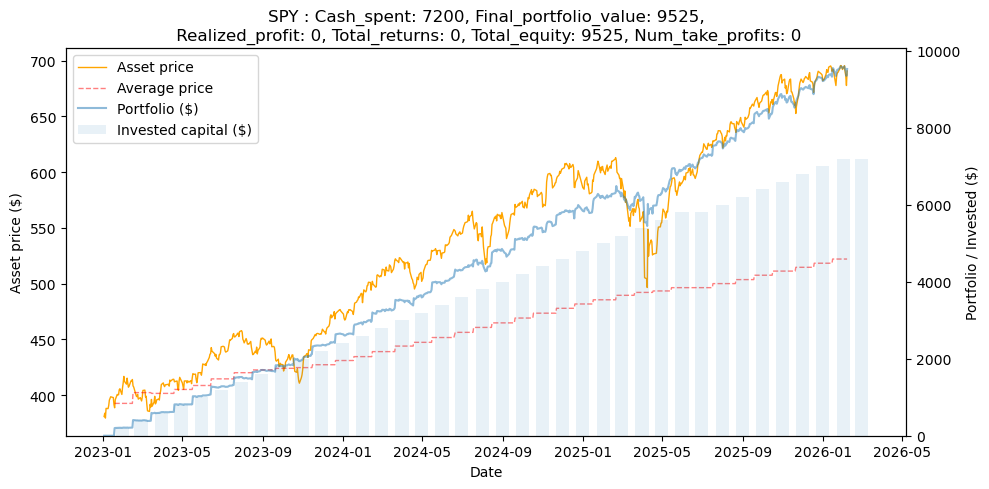

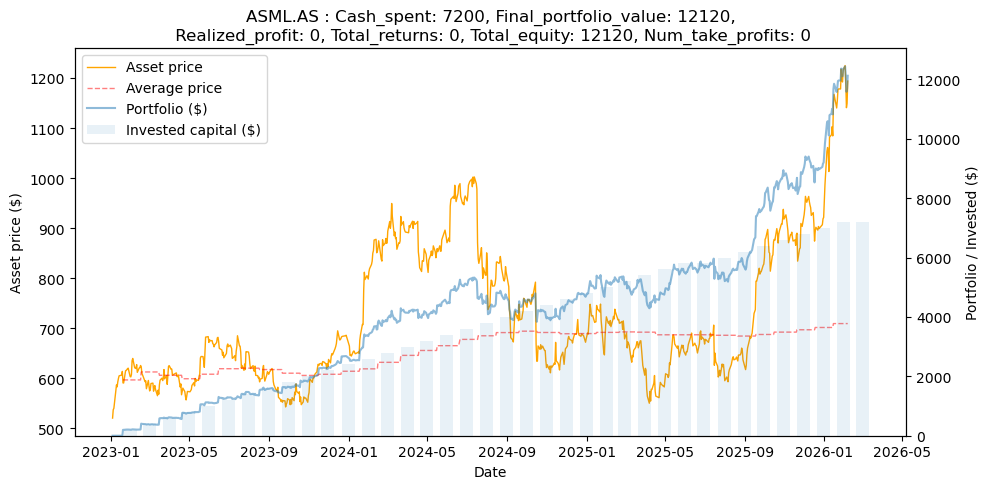

In [6]:
for stock in df_stocks.columns:
    stock_prices = df_stocks[stock]

    backtest_dca(
        target=stock,
        prices=stock_prices,
        buy_amount=cfg.stock_regular_amount,
        freq=cfg.stock_freq,
        fee=cfg.stock_fee,
        profit_multiple=cfg.stock_profit_multiple,
        cooldown_days=180,
        plot=True
    )